# SYRIATEL CUSTOMER CHURN DATA ANALYSIS

**By :** Lydia Mutanu 

## OVERVIEW
***

This project aims to develop a predictive model that can identify customers at risk of terminating their services. By analyzing customer behavior and demographic data, we will be able to uncover patterns that signal potential churn.

## Business Understanding

### Problem Statement

SyriaTel is confronted with the challenge of maintaining its customer base. Customer churn not only results in revenue loss but also impacts the company's reputation and market standing. The objective is to create a predictive model that can effectively identify customers at risk of churning, allowing SyriaTel to implement targeted retention strategies.


### Column Name Description

- **state:** the state the user lives in
- **account length:** the number of days the user has this account
- **area code:** the code of the area the user lives in
- **phone number:** the phone number of the user
- **international plan:** true if the user has the international plan, otherwise false
- **voice mail plan:** true if the user has the voice mail plan, otherwise false
- **number vmail messages:** the number of voice mail messages the user has sent
- **total day minutes:** total number of minutes the user has been in calls during the day
- **total day calls:** total number of calls the user has done during the day
- **total day charge:** total amount of money the user was charged by the Telecom company for calls during the day
- **total eve minutes:** total number of minutes the user has been in calls during the evening
- **total eve calls:** total number of calls the user has done during the evening
- **total eve charge:** total amount of money the user was charged by the Telecom company for calls during the evening
- **total night minutes:** total number of minutes the user has been in calls during the night
- **total night calls:** total number of calls the user has done during the night
- **total night charge:** total amount of money the user was charged by the Telecom company for calls during the night
- **total intl minutes:** total number of minutes the user has been in international calls
- **total intl calls:** total number of international calls the user has done
- **total intl charge:** total amount of money the user was charged by the Telecom company for international calls
- **customer service calls:** number of customer service calls the user has done
- **churn:** true if the user terminated the contract, otherwise false

### Research questions

1. what are the indicators that show likely to churn?
2. Which state has the highest churn rate
3. Does the type of customer service affect churn?
4. What is the correlation between minutes and churn?
5. Does the presence of an international calls affect the churn rate?
6. Does the account length affect the churn?
7. Does charge affect churn?

## ANALYSIS OBJECTIVES
***

* Create a smart model: Develop a machine learning model that can accurately predict which customers are likely to leave based on their past behavior.
 * Understand the reasons: Identify the key factors that significantly contribute to customer churn to understand why customers are leaving.
 * Make accurate predictions: Aim for high accuracy and recall in the churn prediction model to minimize both false negatives (customers who leave but are not predicted) and false positives (customers predicted to leave but don't).
 * Take action to prevent churn: Use the prediction model to develop strategies to reduce customer churn and address the problem.
 * Provide advice to the company: Give recommendations to the company on how to retain customers and maintain their market share.

## DATA UNDERSTANDING
***

In [334]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, precision_recall_curve, roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline

Let's begin by taking a look at the data from **customer churn anaysis**

In [335]:
# Load the data
df= pd.read_csv('bigml_59c28831336c6604c800002a.csv')

In [336]:
# checking the first 10 rows
df.head(10)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,...,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,...,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False


In [337]:
# checking the shape of the data
df.shape

(3333, 21)

In [338]:
# description of the data
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [339]:
# Information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

## DATA PREPARATION
***

In this section we will prepare the data by identifying and collecting relevant data sources and cleaning data by handling missing values and removing duplicates

In [340]:
# Convert column names to lowercase and replace empty spaces with underscores
df.columns = df.columns.str.lower().str.replace(' ', '_')

converting "churn" to numeric with 0 representing false(not churned) and 1 reprenting true(churned)

In [341]:
# Replace false/true with 0,1
df['churn'] = df['churn'].replace({False:0, True:1})
df.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_15880\3641199626.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['churn'] = df['churn'].replace({False:0, True:1})


,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [342]:
# checking for null values
df.isnull().sum()

state                     0
account_length            0
area_code                 0
phone_number              0
international_plan        0
voice_mail_plan           0
number_vmail_messages     0
total_day_minutes         0
total_day_calls           0
total_day_charge          0
total_eve_minutes         0
total_eve_calls           0
total_eve_charge          0
total_night_minutes       0
total_night_calls         0
total_night_charge        0
total_intl_minutes        0
total_intl_calls          0
total_intl_charge         0
customer_service_calls    0
churn                     0
dtype: int64

there are no null values

In [343]:
#checking for duplicates
df.duplicated().sum()

0

There are no duplicate values in the dataset

# EDA

We will split the data into numerical and categorical: 

**The numerical columns** are number vmail messages','total day minutes','total day calls','total day charge','total eve minutes','total eve calls','total eve charge','total night minutes','total night calls','total night charge','total intl minutes','total intl calls','total intl charge','customer service calls'

**The categorical columns** are 'state','international plan','voice mail plan','area code'

Let's analyze the numeric columns


1. Identifying Numeric Features:

In [344]:
# This line filters the DataFrame df to select only columns containing numeric data types
df2 = df.select_dtypes(include=['float64','int64'])

2. Creating Subplots for Visualization:

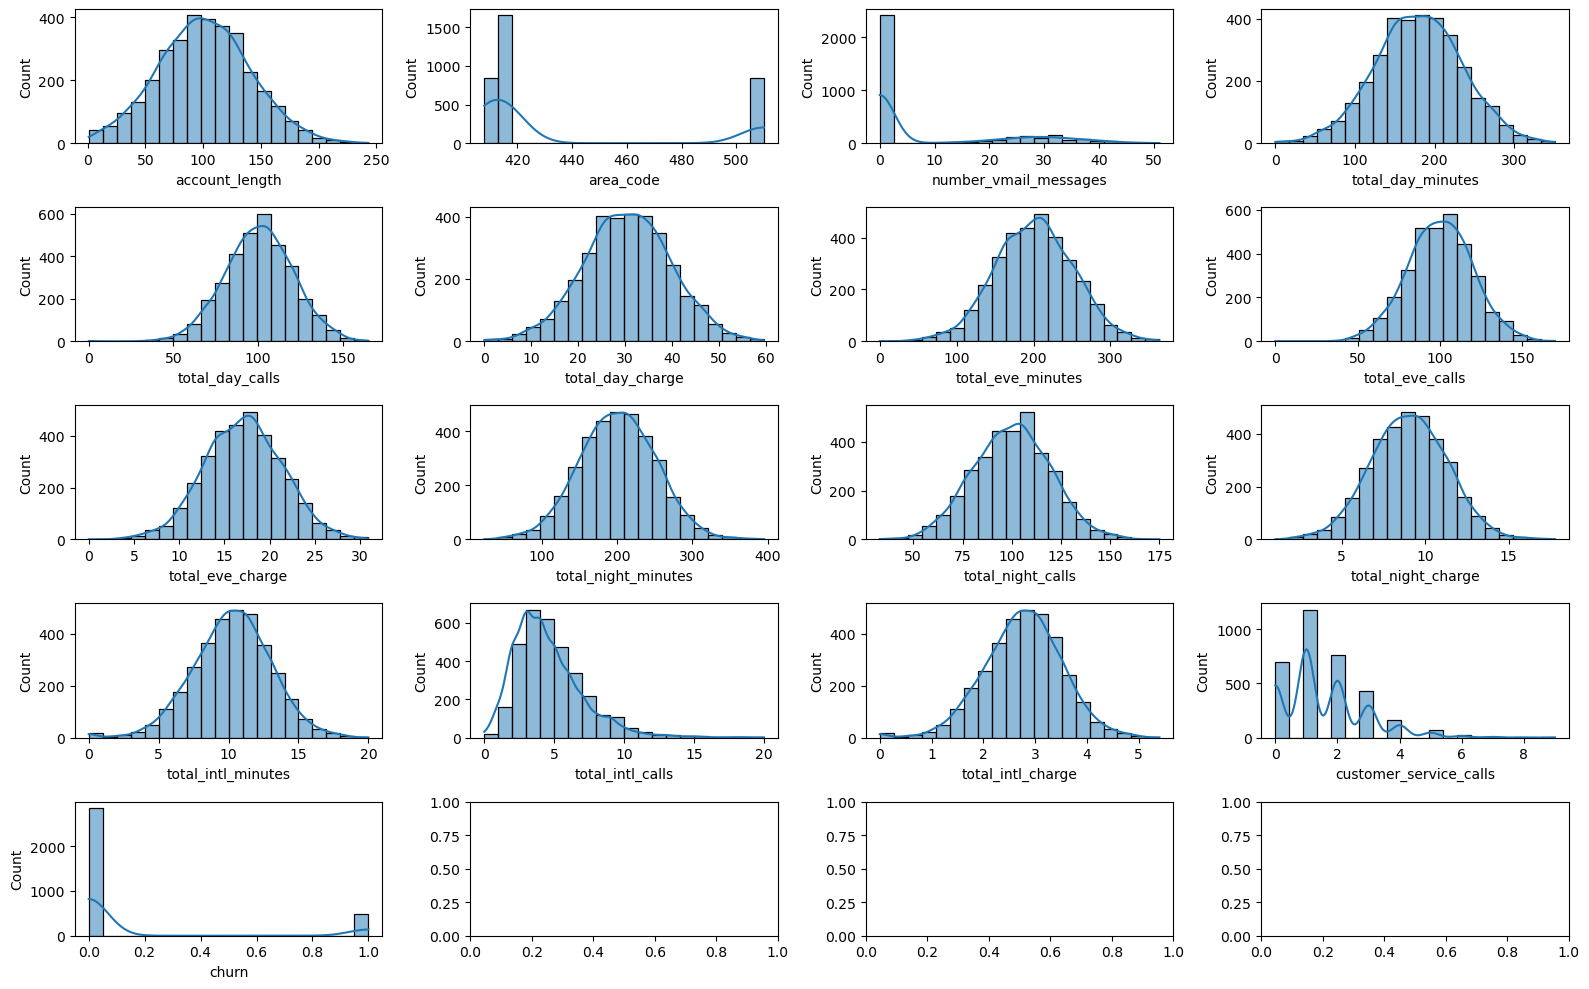

In [345]:
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(16, 10))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Iterate through numeric columns and plot histograms
for i, feature in enumerate(df2):
    sns.histplot(df[feature], ax=axes[i], kde=True, bins=20)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

now let's analyze categorical columns

### International Plan and voice_mail_plan distribution

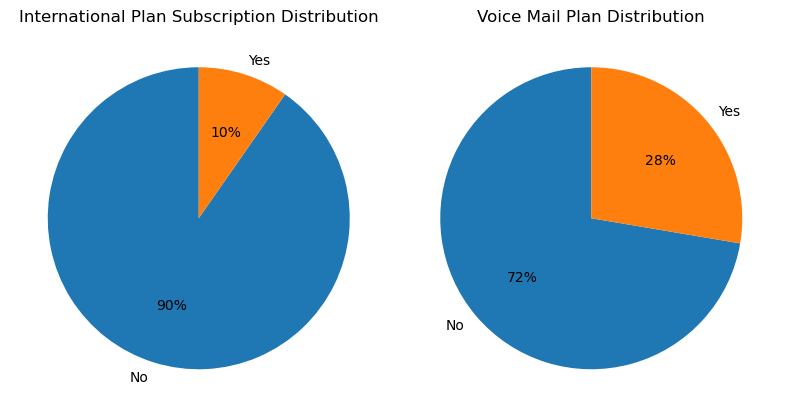

In [346]:
plt.figure(figsize=(8, 6))

# Plot the first pie chart
plt.subplot(1, 2, 1)
ax1 = df['international_plan'].value_counts()
plt.pie(ax1, labels=['No', 'Yes'], autopct='%.0f%%', startangle=90)
plt.title('International Plan Subscription Distribution')

# Plot the second pie chart 
plt.subplot(1, 2, 2)
ax2 = df['voice_mail_plan'].value_counts()
plt.pie(ax2, labels=['No', 'Yes'], autopct='%.0f%%', startangle=90)
plt.title('Voice Mail Plan Distribution')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

The number of customer with no voice mail plan is higher than the number of customers with voice mail plans
The number of customers with an international plan is lower than the number of customers without an international plan

### Minutes Distribution

In [347]:
#function to create a pie chart
def pie (title, x_axis, labels):
    plt.figure(figsize=(6, 6))

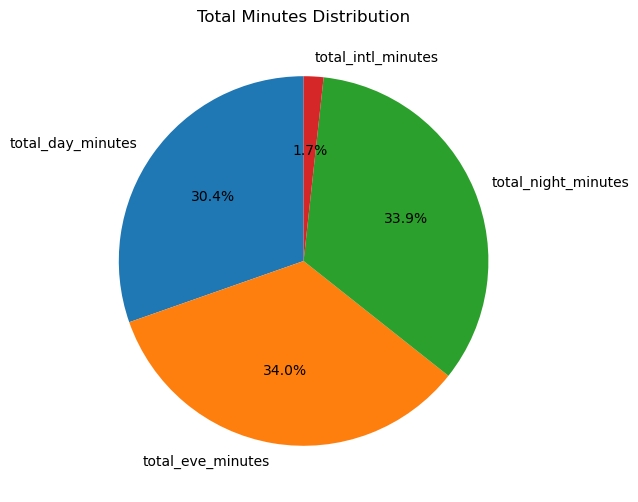

In [348]:
col_sum = ['total_day_minutes', 'total_eve_minutes', 'total_night_minutes', 'total_intl_minutes']

# Calculate the sum for each column
sums = df[col_sum].sum()

# Plot a pie chart
plt.figure(figsize=(6, 6))
plt.pie(sums, labels=sums.index, autopct='%1.1f%%', startangle=90)
plt.title('Total Minutes Distribution')
plt.show()

* Total day minutes: 30.4%
* Total evening minutes: 34.0%
* Total night minutes: 33.9%
* Total international minutes: 1.7%

This visualization suggests that the majority of the minutes were spent on evening and night calls, with day calls being slightly less and international calls being the least.

### Churn Distribution

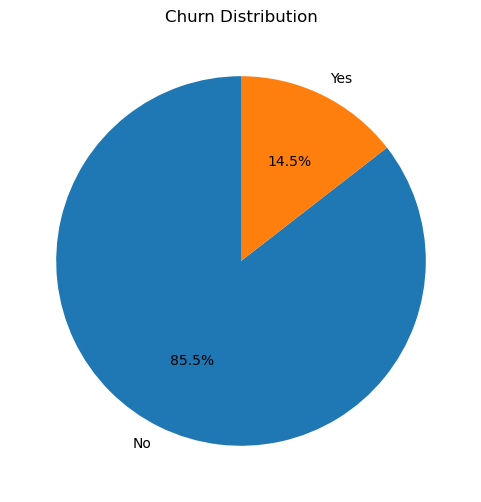

In [349]:
churn_counts = df['churn'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(churn_counts, labels=['No', 'Yes'], autopct='%1.1f%%', startangle=90)
plt.title('Churn Distribution')
plt.show()

- The pie chart demonstrates that a smaller percentage of customers are churning (leaving) compared to those who are staying. This insight is valuable for businesses to understand the current state of customer retention and can inform strategies aimed at reducing churn and enhancing customer satisfaction.

### Area Code Distribution

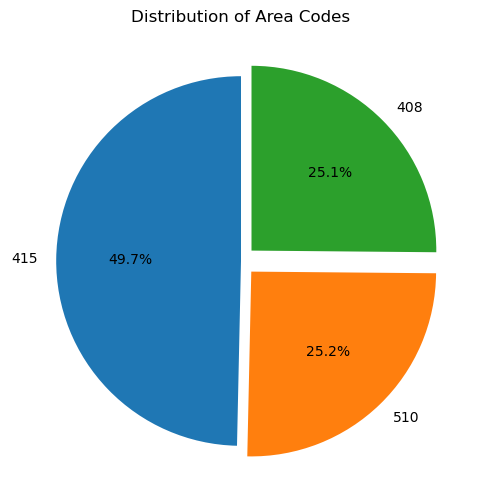

In [350]:
area_code_counts = df['area_code'].value_counts()

# Plot a pie chart
plt.figure(figsize=(6, 6))
plt.pie(area_code_counts, labels=area_code_counts.index, autopct='%1.1f%%', startangle=90, explode = (0, 0.08, 0.08))
plt.title('Distribution of Area Codes')
plt.show()

From the above results, it shows that the area code 415 has the highest frequency followed by 510 and 408
Its suggests that a significant portion of customers are from 415

### Churn Distribution by State

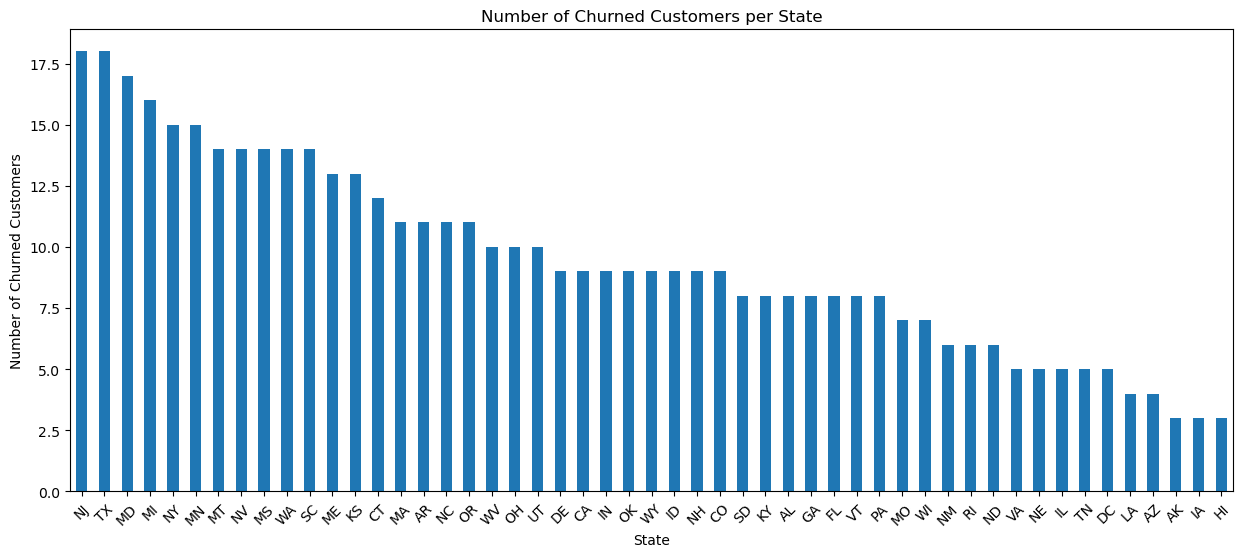

In [351]:
churned_df = df[df['churn'] == 1]  # Filter DataFrame to include only churned customers
state_churned_count = churned_df['state'].value_counts()  # Count the number of churned customers per state

# Plotting the number of churned customers per state
plt.figure(figsize=(15, 6))
state_churned_count.plot(kind='bar')
plt.title('Number of Churned Customers per State')
plt.xlabel('State')
plt.ylabel('Number of Churned Customers')
plt.xticks(rotation=45)
plt.show()

- The highest state that did churn was New Jersey state


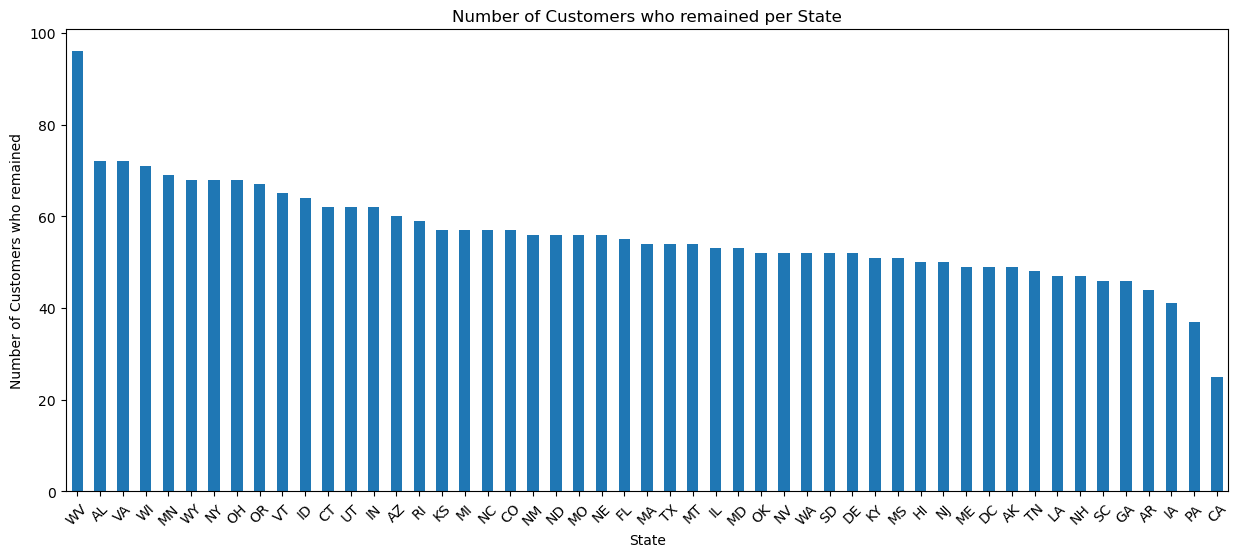

In [352]:
churned_df = df[df['churn'] == 0]  # Filter DataFrame to include only churned customers
state_churned_count = churned_df['state'].value_counts()  # Count the number of churned customers per state

# Plotting the number of churned customers per state
plt.figure(figsize=(15, 6))
state_churned_count.plot(kind='bar')
plt.title('Number of Customers who remained per State')
plt.xlabel('State')
plt.ylabel('Number of Customers who remained')
plt.xticks(rotation=45)
plt.show()

- The highest number of Customers who remained are recorded in West Virginia

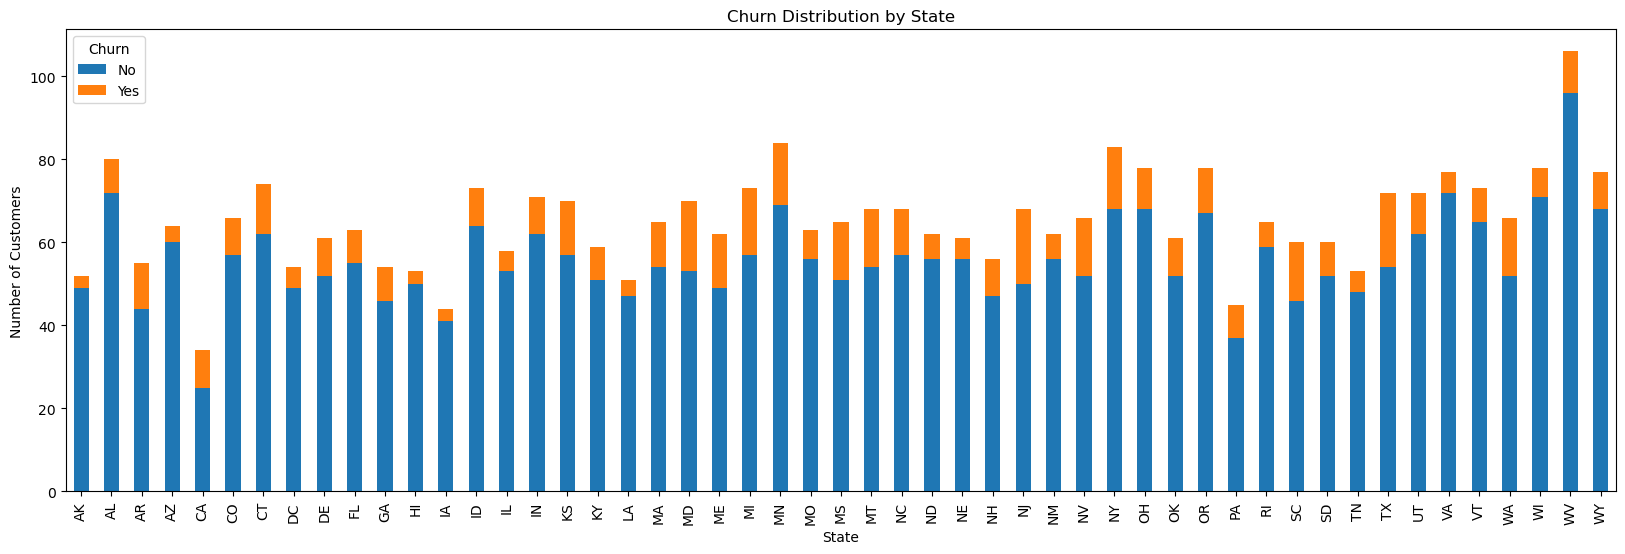

In [353]:
# Plot churn distribution by state
df.groupby(['state', 'churn']).size().unstack().plot(kind='bar', figsize=(20, 6), stacked=True)

plt.title('Churn Distribution by State')
plt.xlabel('State')
plt.ylabel('Number of Customers')
plt.legend(['No', 'Yes'], title='Churn')
plt.show()

- This shows that West Virginia has thr highest number of customers, with a high retention

### Correlation of features with churn


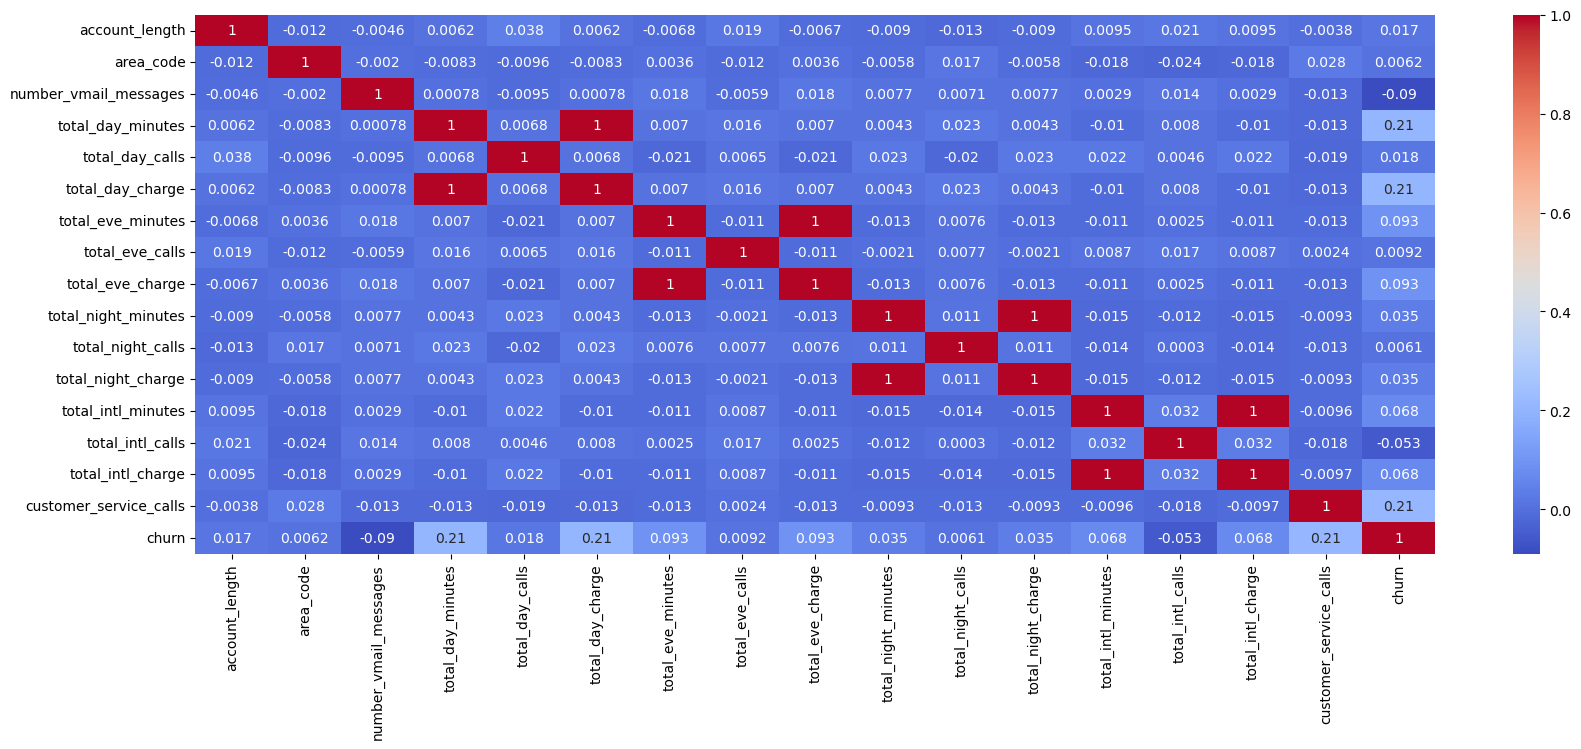

In [354]:
df2 = df.select_dtypes(include=['float64','int64'])
correlation_matrix = df2.corr()

plt.figure(figsize=(20,7))
sns.heatmap(correlation_matrix, annot = True, cmap='coolwarm')
plt.show()

In [355]:
corr_matrix = df2.corr()
churn_corr = corr_matrix['churn'].sort_values(ascending=False)
churn_corr

churn                     1.000000
customer_service_calls    0.208750
total_day_minutes         0.205151
total_day_charge          0.205151
total_eve_minutes         0.092796
total_eve_charge          0.092786
total_intl_charge         0.068259
total_intl_minutes        0.068239
total_night_charge        0.035496
total_night_minutes       0.035493
total_day_calls           0.018459
account_length            0.016541
total_eve_calls           0.009233
area_code                 0.006174
total_night_calls         0.006141
total_intl_calls         -0.052844
number_vmail_messages    -0.089728
Name: churn, dtype: float64



In this case, the variables with the highest positive correlation with "churn" are:

* customer_service_calls: This suggests that customers who make more customer service calls are more likely to churn.

* total_day_minutes and total_day_charge: This suggests that customers who use more day minutes and incur higher charges are more likely to churn.

The variables with the highest negative correlation with "churn" are:

* number_vmail_messages: This suggests that customers who use voicemail messages are less likely to churn.

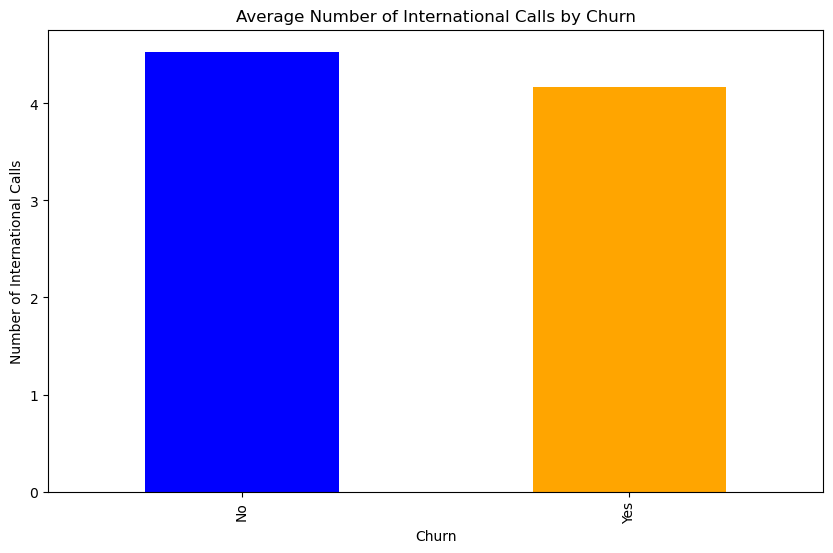

In [356]:
# Calculate average number of international calls for each churn status
total_intl_calls = df.groupby('churn')['total_intl_calls'].mean() 

plt.figure(figsize=(10, 6))  # Create a new figure with specific size
total_intl_calls.plot(kind='bar', color=['blue', 'orange'])  # Create a bar plot
plt.title('Average Number of International Calls by Churn')  # Add title
plt.xlabel('Churn')  # Add label for x-axis
plt.ylabel('Number of International Calls')  # Add label for y-axis


plt.xticks([0, 1], ['No', 'Yes'])  
plt.show()  # Display the plot


### Churn rate by Customer Service Calls

C:\Users\Admin\AppData\Local\Temp\ipykernel_15880\3179922362.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=churn_rate.index, y=churn_rate.values, palette='flare')


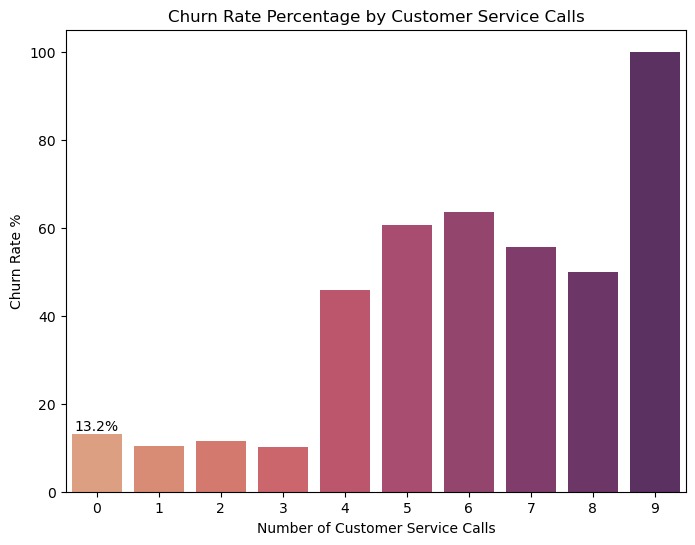

In [357]:
# Calculate churn rate percentage for each number of customer service calls
churn_rate = df.groupby('customer_service_calls')['churn'].mean() * 100

# Plotting a bar plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=churn_rate.index, y=churn_rate.values, palette='flare')
ax.bar_label(ax.containers[0], fmt='%.1f%%', label_type='edge') # Add % labels


# Adding title and labels
plt.title('Churn Rate Percentage by Customer Service Calls')
plt.xlabel('Number of Customer Service Calls')
plt.ylabel('Churn Rate %')

# Display the plot
plt.show()

###  There is a positive correlation between the number of customer service calls and the likelihood of churn. 

- As the number of customer service calls increases, customers are more likely to churn, or stop using the service. However, there is a disparity in the trend. Specifically, there is a noticeable increase in churn at the 6th customer service call.



## look at the correlation between features

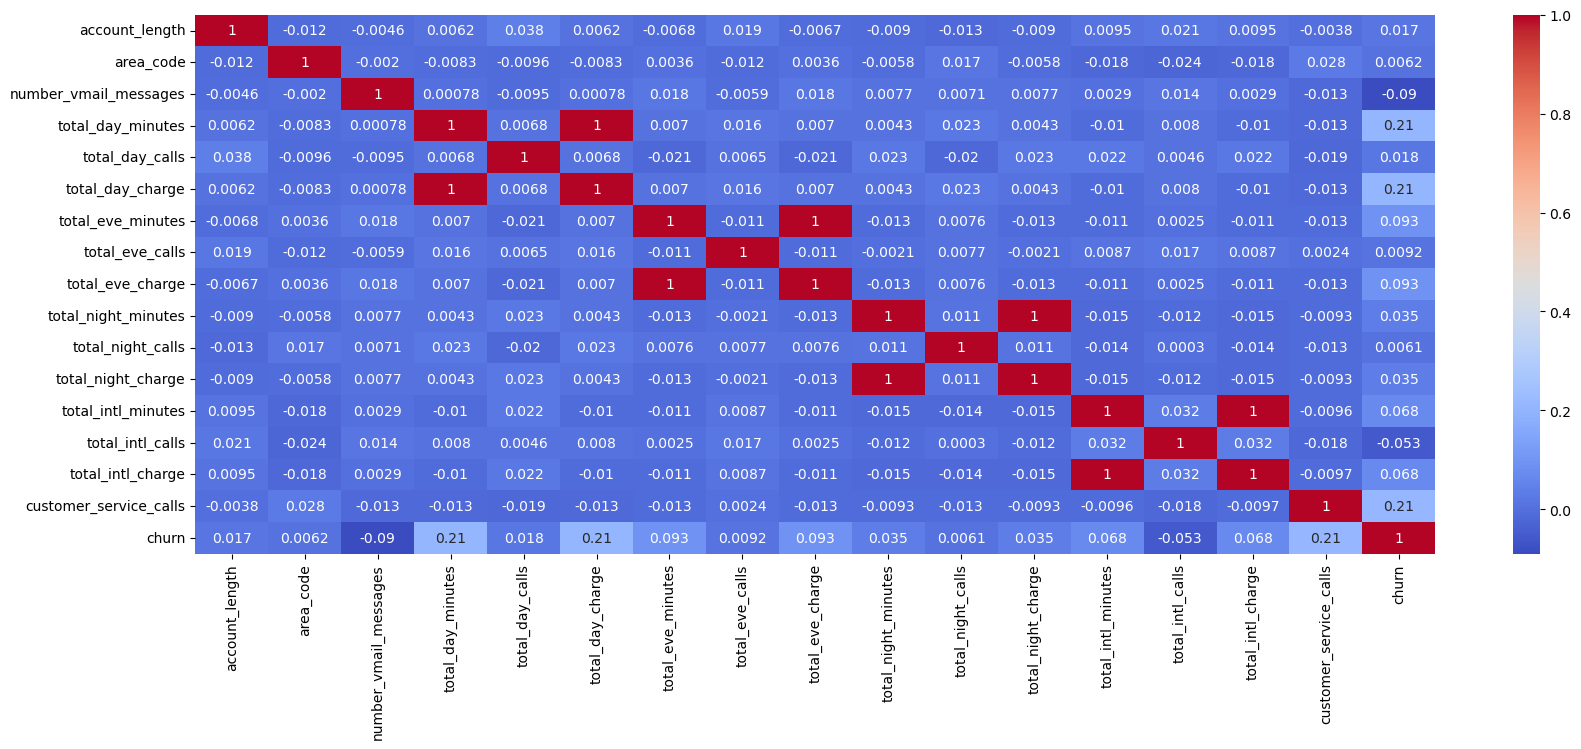

In [358]:
df2 = df.select_dtypes(include=['float64','int64'])
correlation_matrix = df2.corr()

plt.figure(figsize=(20,7))
sns.heatmap(correlation_matrix, annot = True, cmap='coolwarm')
plt.show()

In [359]:
churn_corr

churn                     1.000000
customer_service_calls    0.208750
total_day_minutes         0.205151
total_day_charge          0.205151
total_eve_minutes         0.092796
total_eve_charge          0.092786
total_intl_charge         0.068259
total_intl_minutes        0.068239
total_night_charge        0.035496
total_night_minutes       0.035493
total_day_calls           0.018459
account_length            0.016541
total_eve_calls           0.009233
area_code                 0.006174
total_night_calls         0.006141
total_intl_calls         -0.052844
number_vmail_messages    -0.089728
Name: churn, dtype: float64

We can drop one of the columns with a 1 correlation (total day minutes and total day charge), (total eve minutes and total eve charge), (total night minutes and total night charge), (total intl minutes and total intl charge) and phone number.

- total day charge
- total eve charge
- total night charge
- total intl charge

In [360]:
# drop the columns
cols_drop = ['total_day_charge', 'total_eve_charge', 'total_night_charge', 'total_intl_charge', 'phone_number']
df3 = df.drop(cols_drop, axis=1)
df3.head(2)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,customer_service_calls,churn
0,KS,128,415,no,yes,25,265.1,110,197.4,99,244.7,91,10.0,3,1,0
1,OH,107,415,no,yes,26,161.6,123,195.5,103,254.4,103,13.7,3,1,0


In [361]:
df3.dtypes

state                      object
account_length              int64
area_code                   int64
international_plan         object
voice_mail_plan            object
number_vmail_messages       int64
total_day_minutes         float64
total_day_calls             int64
total_eve_minutes         float64
total_eve_calls             int64
total_night_minutes       float64
total_night_calls           int64
total_intl_minutes        float64
total_intl_calls            int64
customer_service_calls      int64
churn                       int64
dtype: object

This line extracts the unique values from the 'churn' column. The output array([0, 1], dtype=int64) indicates that the 'churn' variable is binary, with values 0 and 1 likely representing 'not churned' and 'churned', respectively.

In [362]:
df3['churn'].unique()

array([0, 1], dtype=int64)

This line creates dummy variables for the specified categorical columns: 'state', 'international_plan', and 'voice_mail_plan'. Dummy variables are used to represent categorical data in numerical form, which is suitable for machine learning models

In [363]:
# Dummy variables
df4 = pd.get_dummies(df3, columns=['state', 'international_plan', 'voice_mail_plan'], drop_first = True)

In [364]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 65 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account_length          3333 non-null   int64  
 1   area_code               3333 non-null   int64  
 2   number_vmail_messages   3333 non-null   int64  
 3   total_day_minutes       3333 non-null   float64
 4   total_day_calls         3333 non-null   int64  
 5   total_eve_minutes       3333 non-null   float64
 6   total_eve_calls         3333 non-null   int64  
 7   total_night_minutes     3333 non-null   float64
 8   total_night_calls       3333 non-null   int64  
 9   total_intl_minutes      3333 non-null   float64
 10  total_intl_calls        3333 non-null   int64  
 11  customer_service_calls  3333 non-null   int64  
 12  churn                   3333 non-null   int64  
 13  state_AL                3333 non-null   bool   
 14  state_AR                3333 non-null   

### Data Modelling

We start with a Logistic Regression for our baseline model

#### 1. Logistic Regression Model

In [365]:
# Y Target Variable
y = df4['churn']
X = df4.drop('churn', axis = 1)

In [366]:
# Create Scaler Object to standardize


scaler = MinMaxScaler()

# fit and transform
X_scaled = pd.DataFrame(scaler.fit_transform(X))

X_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.524793,0.068627,0.490196,0.755701,0.666667,0.542755,0.582353,0.595750,0.408451,0.500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.438017,0.068627,0.509804,0.460661,0.745455,0.537531,0.605882,0.621840,0.492958,0.685,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.561983,0.068627,0.000000,0.693843,0.690909,0.333242,0.647059,0.374933,0.500000,0.610,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.342975,0.000000,0.000000,0.853478,0.430303,0.170195,0.517647,0.467187,0.394366,0.330,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.305785,0.068627,0.000000,0.475200,0.684848,0.407754,0.717647,0.440290,0.619718,0.505,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [367]:
# perform train test split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Create a logistic regression model
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')

# fit the model on the training data
logreg.fit(X_train, y_train)

LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')

In [368]:
# Generate predictions
y_hat_train = logreg.predict(X_train)
y_hat_test = logreg.predict(X_test)

In [369]:
# Calulate the performance metrics

# Accuracy
accuracy = accuracy_score(y_test, y_hat_test)
print(f"Accuracy: {accuracy}")

# Precision
precision = precision_score(y_test, y_hat_test)
print(f"Precision: {precision}")

# Recall
recall = recall_score(y_test, y_hat_test)
print(f"Recall: {recall}")

# F1-score
f1 = f1_score(y_test, y_hat_test)
print(f"F1-score: {f1}")

# False positive rate(fpr) and true positive rate(tpr)
fpr, tpr, thresholds = roc_curve(y_test, y_hat_test)

# calculate the AUC
auc = auc(fpr, tpr)
print(f"AUC: {auc}")

Accuracy: 0.8515742128935532
Precision: 0.5294117647058824
Recall: 0.1782178217821782
F1-score: 0.26666666666666666
AUC: 0.5749746352727145


- Accuracy: Our classifier shows that our model 85% accurate
- Presicion:  Out of all the instances our model predicted as positive, approximately 52.94% were actually positive.
- Recall: Being approximately 17.82%, means that out of all the actual positive instances, our model identified approximately 17.82% correctly.
- F1 score provides a balance between precision and recall. In our case, the F1-score is approximately 26.67%.
- AUC is approximately 0.575, suggesting that our model's ability to distinguish between positive and negative classes is more or less the same as random guessing.


<Axes: >

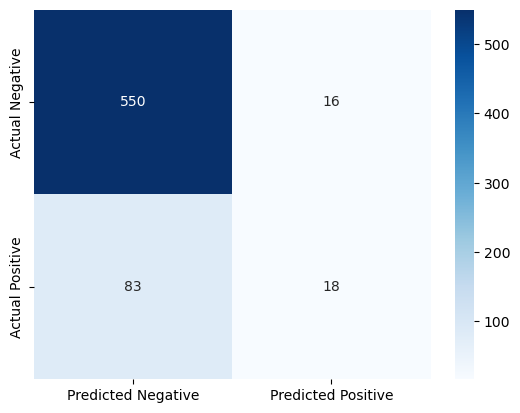

In [370]:
# Build a confusion matrix

# Confusion matrix
cm = confusion_matrix(y_test, y_hat_test)

#  Visualize
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])

- The model predicted 18 True Positives, 551 True Negatives, 15 False Positives and 83 False Negatives.
- The model predicted 18 customers would churn and they did.
- The model predicted that 551 customers would not churn and they didn't
- The model predicted that 15 customers would churn but they didn't
- The model incorrectly predicted that 83 customers would not churn but they actually churned

##### To check if the model is imbalanced

In [371]:
# Calculate class distribution
class_counts = df4['churn'].value_counts()
majority_class = class_counts.idxmax()
majority_count = class_counts.max()

# Check for imbalance. Threshold for imbalance --> 0.8
if majority_count / len(df4) > 0.8:  
    print('df4 is imbalanced.')
else:
    print('df4 is balanced.')

df4 is imbalanced.


- Due to the imbalance  of the data we use Random Forest since it handles imbalance better compared to Logistic Regression models

#### 2. Random Forest

In [372]:
# Create and fit a random forest classifier


clf = RandomForestClassifier(random_state=0)
clf = clf.fit(X_train, y_train)

In [373]:

# Predictions on the testing data
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Calculate F1-score
f1 = f1_score(y_test, y_pred)
print(f"F1-score: {f1}")

# Calculate precision and recall for different thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_pred)

print(f"ROC AUC: {roc_auc}")

Accuracy: 0.9280359820089955
F1-score: 0.6962025316455697
ROC AUC: 0.7705104432704755


- F1-score being 69.6% is moderately good performance. AUC of 77% is okay for the imbalanced data. This gives a generally good performance of the model.
- Having an accuracy of 92.9%, performs better than that of Logistic Regression Model, 85.3%

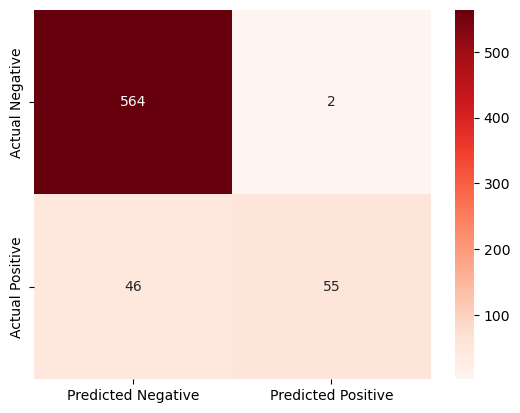

In [374]:

cm1 = confusion_matrix(y_test, y_pred)
# Visualize the confusion matrix
sns.heatmap(cm1, annot=True, fmt="d",  cmap='Reds',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.show()

- The model predicted 55 True Positives, 564 True Negatives, 2 False Positives and 46 False Negatives.
- The model predicted 55 customers would churn and they did.
- The model predicted that 564 customers would not churn and they didn't
- The model predicted that 2 customers would churn but they didn't
- The model incorrectly predicted that 46 customers would not churn but they actually churned

Random Forest has performed better that the logistic Regression model.

#### Hyperparameter tuning

In [375]:
# Define hyperparameter grid

param_grid = {
    'n_estimators': [100, 125, 150],
    'max_depth': [5, 10, 15, 20, 25],
    'min_samples_leaf': [1, 2],
    'min_samples_split': [2, 5],
    'criterion': ['gini', 'entropy'],
}        

# Create Random Forest model
clf = RandomForestClassifier(random_state=0)

# Initialize GridSearchCV with early stopping and smaller training fraction
grid_search = GridSearchCV(clf, param_grid, scoring='f1', cv=3, n_jobs=-1)

# Fit the model on a smaller portion of training data (replace 0.8 with a suitable fraction)
grid_search.fit(X_train[:int(0.8 * len(X_train))], y_train[:int(0.8 * len(y_train))])

 # Get best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

 # Evaluate on the testing set
y_pred = best_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"F1-score: {f1}")
print(f"Best Hyperparameters: {best_params}")

Accuracy: 0.9295352323838081
F1-score: 0.6967741935483871
Best Hyperparameters: {'criterion': 'gini', 'max_depth': 25, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 150}


- about 92.9% of the insttances was correctly predicted
- 69.6% F1-score shows a relatively good precision and recall

#### 3. DecisionTrees

In [376]:
#Instantiate DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(random_state=42)

In [377]:
#Fit on the training data
dt_clf.fit(X_train, y_train)

#predict on the test set
dt_y_pred = dt_clf.predict(X_test)

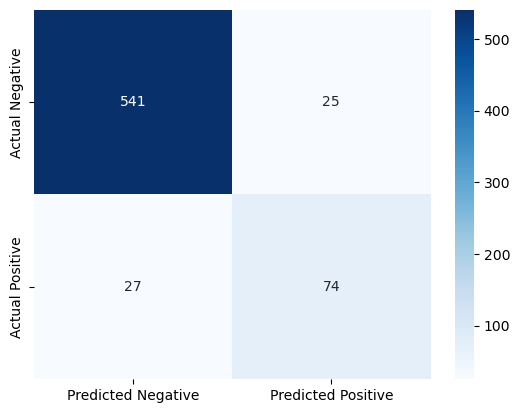

In [388]:
cm3 = confusion_matrix(y_test, dt_y_pred)
# Visualize the confusion matrix
sns.heatmap(cm3, annot=True, fmt="d",  cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.show()

- We can see that the model made correct predictions for 541 negative cases and 74 positive cases. However, it incorrectly predicted 25 positive cases as negative and 27 negative cases as positive.

In [379]:
# Calculate accuracy
accuracy = accuracy_score(y_test, dt_y_pred)
print(f"Accuracy: {accuracy}")

# Calculate F1-score
f1 = f1_score(y_test, dt_y_pred)
print(f"F1-score: {f1}")

# Calculate precision and recall for different thresholds
precision, recall, thresholds = precision_recall_curve(y_test, dt_y_pred)

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, dt_y_pred)

print(f"ROC AUC: {roc_auc}")

Accuracy: 0.9220389805097451
F1-score: 0.74
ROC AUC: 0.844251828009656


## Model Evaluation

Let's select the best model from the three models above. We use the ROC curve and also assess their accuracy to check on whether one is overfitting. We will consider the one with the best AUC and also does not overfit. 

In [381]:
 #Make predictions on the test
y_pred_LR = logreg.predict(X_test)

# Calculate probability predictions for the positive class
# Assuming positive class is at index 1
lr_predictions_proba = logreg.predict_proba(X_test)[:, 1]  

In [383]:
# Calculate probability predictions for the positive class for decision tree
dec_clf =  DecisionTreeClassifier()
dec_clf.fit(X_train, y_train)
dt_predictions_proba = dec_clf.predict_proba(X_test)[:, 1]

In [389]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the models
lr_model = LogisticRegression(max_iter=1000)
rf_model = RandomForestClassifier()
dt_model = DecisionTreeClassifier()

# Train the models
lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)

# Make predictions on the test data
lr_predictions = lr_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)
dt_predictions = dt_model.predict(X_test)

# Calculate accuracy scores
lr_accuracy = accuracy_score(y_test, lr_predictions)
rf_accuracy = accuracy_score(y_test, rf_predictions)
dt_accuracy = accuracy_score(y_test, dt_predictions)

print("Logistic Regression Accuracy:", lr_accuracy)
print("Random Forest Accuracy:", rf_accuracy)
print("Decision Tree Accuracy:", dt_accuracy)

# Calculate ROC curve and AUC for Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_model.predict_proba(X_test)[:, 1])
roc_auc_lr = auc(fpr_lr, tpr_lr)

# Calculate ROC curve and AUC for Decision Tree
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_model.predict_proba(X_test)[:, 1])
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Plot ROC curves
plt.figure()

plt.plot(fpr_lr, tpr_lr, color='darkorange', label='ROC curve (Logistic Regression) (AUC = %0.2f)' % roc_auc_lr)
plt.plot(fpr_dt, tpr_dt, color='darkblue', label='ROC curve (Decision Tree) (AUC = %0.2f)' % roc_auc_dt)

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.8515742128935532
Random Forest Accuracy: 0.9265367316341829
Decision Tree Accuracy: 0.9295352323838081


TypeError: 'numpy.float64' object is not callable

Decision TreeClassifier has the highest AUC(0.9295352323838081) hence its the best performing

##### To check for important features

We use a simple bar graph to see the top features that can help determine churn rate

In [390]:
# first drop the 'state' columns
feature_names = df4.drop(columns=[col for col in df4.columns if 'state' in col])
feature_names.columns

Index(['account_length', 'area_code', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_eve_minutes',
       'total_eve_calls', 'total_night_minutes', 'total_night_calls',
       'total_intl_minutes', 'total_intl_calls', 'customer_service_calls',
       'churn', 'international_plan_yes', 'voice_mail_plan_yes'],
      dtype='object')

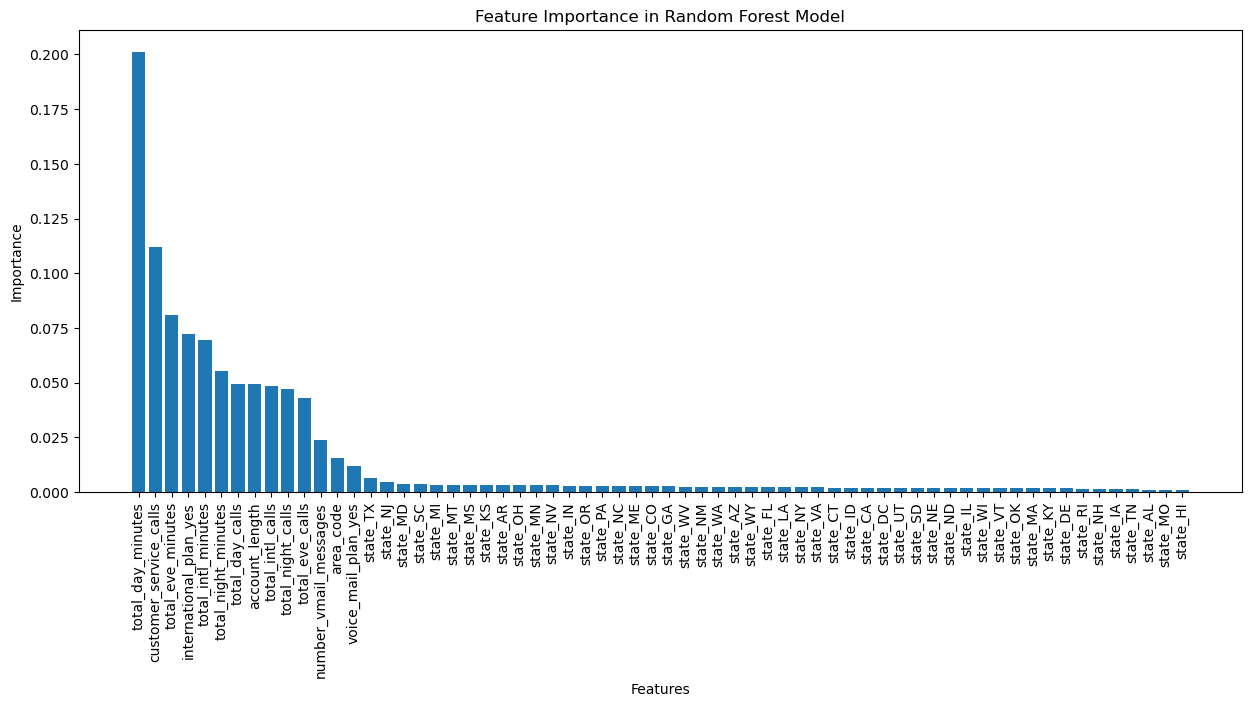

In [391]:


# Create and train the Random Forest classifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Get feature importances
feature_importances = rf.feature_importances_

# Sort feature importances in descending order
sorted_idx = feature_importances.argsort()[::-1]
sorted_features = X.columns[sorted_idx]
sorted_importances = feature_importances[sorted_idx]

# Create the bar plot
plt.figure(figsize=(15, 6))
plt.bar(sorted_features, sorted_importances)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance in Random Forest Model')
plt.xticks(rotation=90)
plt.show()

- From the graph, we can conclude the top features are:
    - Total day minutes
    - Customer service calls
    - Total eve minutes
    - Internal plan (Those that had subscribed)
    - Total minutes

## Conclusion
Decision Tree appears to be the best model to predict the customers likely to churn.

## BUT While the Decision Tree achieved the highest accuracy, Random Forest could be a more reliable choice for deployment due to its better generalization ability. The final decision should depend on additional metrics (e.g., precision, recall, and F1-score) and validation on unseen data to confirm the robustness of the models

The churn prediction analysis conducted for SyriaTel aimed to develop a classifier to identify customers likely to terminate their services. Through comprehensive data exploration, preparation, and modeling, several key findings emerged:

- Random Forest emerged as the most effective model for churn prediction. It exhibited superior accuracy and predictive power, making it the preferred choice for SyriaTel's churn prediction system.

- Total day minutes, customer service calls, and subscription to the international plan were identified as crucial indicators of churn. These insights provide valuable guidance for SyriaTel in devising proactive retention strategies targeted at high-risk customers.


## Recommendation

Based on the plot, some recommendations would be:
- Targeted Marketing Campaigns: Implement targeted marketing campaigns to high-risk customers to incentivize them to stay.
- Improve Customer Service and Support: Enhance customer service and support channels to address customer concerns and improve satisfaction.
- Personalized Incentives and Promotions: Offer personalized incentives and promotions to retain valuable customers.
- Loyalty Programs: Implement loyalty programs to reward long-term customers.
- Continuous Monitoring: Continuously monitor customer behavior and retrain the model as needed to adapt to changing trends.

# Next Steps

1. Deployment: Deploy the selected model into a production environment to make real-time predictions.
2. Data Collection: Continuously collect more data to improve the model's accuracy and reliability.
3. Model Refinement: Regularly retrain and fine-tune the model to adapt to changing customer behavior and market trends.